In [198]:
import pandas as pd

In [199]:
spreadsheet = pd.read_csv('/Users/bhumikajain/Downloads/user_interactions.csv')

In [200]:
print(spreadsheet)

        User_ID    Page_Viewed  Time_Spent_Seconds
0     User_3198       Homepage                 560
1      User_126  Category Page                 168
2     User_1376  Category Page                 122
3     User_1117      Cart Page                 329
4     User_3683  Category Page                 391
...         ...            ...                 ...
4995  User_3045  Checkout Page                 284
4996  User_1583      Cart Page                 322
4997  User_2627  Checkout Page                 559
4998  User_4976   Product Page                 373
4999  User_1770       Homepage                 104

[5000 rows x 3 columns]


In [201]:
bool_series = pd.isnull(spreadsheet["Time_Spent_Seconds"]) 

In [202]:
spreadsheet[bool_series] 

,User_ID,Page_Viewed,Time_Spent_Seconds


In [203]:
bool_series = pd.isnull(spreadsheet["Page_Viewed"]) 

In [204]:
spreadsheet[bool_series] 

,User_ID,Page_Viewed,Time_Spent_Seconds


In [205]:
bool_series = pd.isnull(spreadsheet["User_ID"]) 

In [206]:
spreadsheet[bool_series] 

,User_ID,Page_Viewed,Time_Spent_Seconds


It indicates that there are no missing values.

<Axes: >

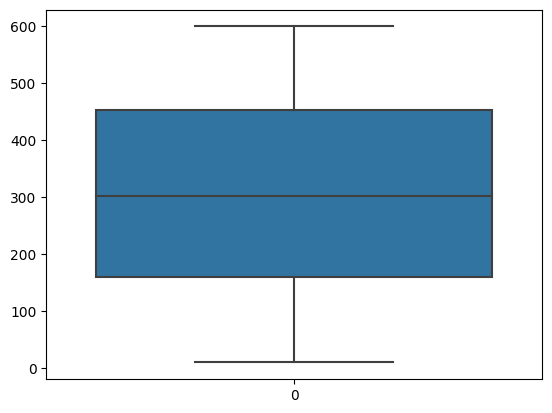

In [207]:
import seaborn as sns
sns.boxplot(spreadsheet['Time_Spent_Seconds'])


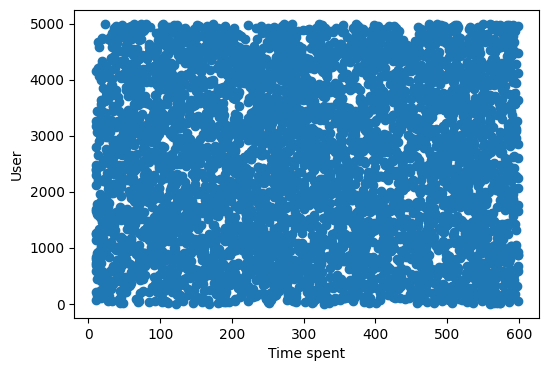

In [208]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(spreadsheet['Time_Spent_Seconds'],spreadsheet.index)
 
# x-axis label
ax.set_xlabel('Time spent')
 
# y-axis label
ax.set_ylabel('User')
plt.show()

The graph above was initially implemented to detect the presence of outliers; however, the data points are evenly distributed, indicating the absence of any outliers.


USER BEHAVIOUR ANALYSIS:


In [209]:
unique_categories_count = spreadsheet['Page_Viewed'].nunique()
print("Number of unique categories in the column:", unique_categories_count)

Number of unique categories in the column: 5


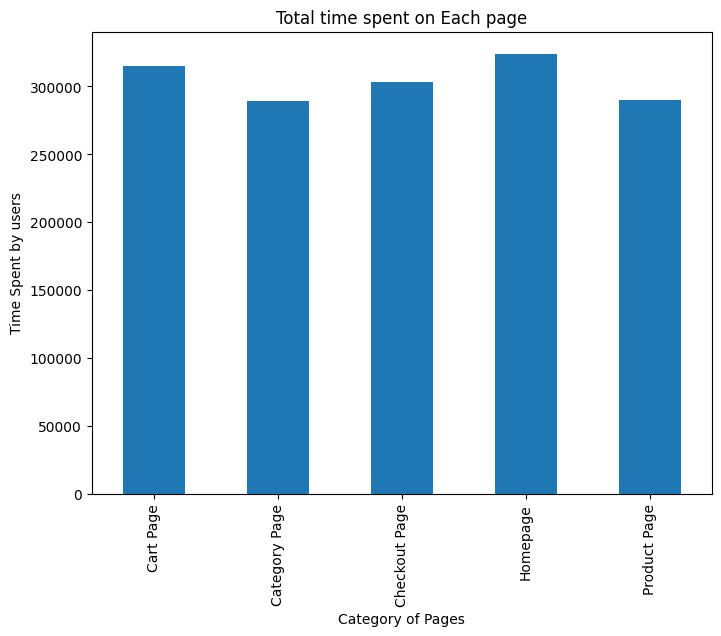

In [210]:
grouped_df = spreadsheet.groupby('Page_Viewed')['Time_Spent_Seconds'].sum()

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
grouped_df.plot(kind='bar', ax=ax)

# Customize the plot
ax.set_xlabel('Category of Pages')
ax.set_ylabel('Time Spent by users')
ax.set_title('Total time spent on Each page')

plt.show()

The graph displayed above represents the distribution of total time spent by users on each page of the website. It reveals that the home page garners the highest amount of user engagement, followed by the cart page and checkout page.

In [211]:
# Step 1: Grouping by Page
grouped_by_page = spreadsheet.groupby('Page_Viewed')

# Step 2: Calculating Average Time Spent
avg_time_spent_per_page = grouped_by_page['Time_Spent_Seconds'].mean()

# Display the result
print(avg_time_spent_per_page)

Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64


To calculate the Click through rate for each section of website we need information such as The number of clicks divided by the number of interactions for a section. As we do not have number of clicks we assume a click event as true if time spent is greater than 50 seconds.

In [212]:
# Step 1: Define the session duration threshold 
threshold = 10

# Step 2: Identify click events based on session duration
spreadsheet['click_event'] = spreadsheet['Time_Spent_Seconds'] > threshold

spreadsheet.head()

,User_ID,Page_Viewed,Time_Spent_Seconds,click_event
0,User_3198,Homepage,560,True
1,User_126,Category Page,168,True
2,User_1376,Category Page,122,True
3,User_1117,Cart Page,329,True
4,User_3683,Category Page,391,True


In [213]:
# Step 3: Group by 'page_viewed' to calculate CTR for each section
grouped_by_section = spreadsheet.groupby('Page_Viewed')
for name, group in grouped_by_section:
    print(f"Group: {name}")
    print(group)
    print()


Group: Cart Page
        User_ID Page_Viewed  Time_Spent_Seconds  click_event
3     User_1117   Cart Page                 329         True
6     User_4461   Cart Page                 146         True
7      User_435   Cart Page                 335         True
11    User_2527   Cart Page                 565         True
14    User_3250   Cart Page                 111         True
...         ...         ...                 ...          ...
4971   User_466   Cart Page                 326         True
4982  User_2636   Cart Page                 513         True
4991  User_3444   Cart Page                 486         True
4994  User_1436   Cart Page                 550         True
4996  User_1583   Cart Page                 322         True

[1041 rows x 4 columns]

Group: Category Page
        User_ID    Page_Viewed  Time_Spent_Seconds  click_event
1      User_126  Category Page                 168         True
2     User_1376  Category Page                 122         True
4     User_3

In [214]:
# Step 4: Calculate the total clicks and total interactions for each section
total_clicks = grouped_by_section['click_event'].sum()
total_interactions = grouped_by_section.size()

# Step 5: Calculate CTR for each section
ctr = (total_clicks / total_interactions) * 100

# Display the result
print(ctr)

Page_Viewed
Cart Page        100.000000
Category Page     99.588477
Checkout Page     99.898888
Homepage          99.808612
Product Page      99.790136
dtype: float64


PURCHASE ANALYSIS:

In [215]:
df = pd.read_csv('/Users/bhumikajain/Downloads/purchase_data.csv')

In [216]:
print(df)

      Purchase_ID    User_ID  Product_ID  Transaction_Amount   
0    Purchase_948  User_3840  Product_19           62.843031  \
1    Purchase_905  User_1846   Product_9           21.780079   
2    Purchase_704  User_1700   Product_8          138.264455   
3    Purchase_766  User_4117  Product_15           74.991367   
4     Purchase_36  User_3053   Product_7          162.569998   
..            ...        ...         ...                 ...   
995  Purchase_489  User_2879  Product_14           47.047885   
996  Purchase_741   User_588   Product_1           85.587089   
997  Purchase_587  User_3821  Product_16          162.919467   
998  Purchase_222  User_1804  Product_10           44.435545   
999  Purchase_609  User_3364  Product_14          147.367700   

           Purchase_Time  
0    2023-04-02 16:35:46  
1    2023-04-14 16:38:27  
2    2023-01-21 11:21:31  
3    2023-01-29 04:44:04  
4    2023-05-24 03:30:23  
..                   ...  
995  2023-04-10 17:38:54  
996  2023-02-19

The overall conversion rate is the percentage of users who have made a purchase out of the total number of unique visitors or users on the website. 

In [217]:
total_unique_users = spreadsheet['User_ID'].nunique()
print(total_unique_users)

total_unique_purchasers = df['User_ID'].nunique()
print(total_unique_purchasers)

conversion_rate = (total_unique_purchasers / total_unique_users) * 100
print("conversion rate:",conversion_rate)


3210
916
conversion rate: 28.53582554517134


In [218]:
unique_categories = df['Product_ID'].unique()
print(unique_categories)

['Product_19' 'Product_9' 'Product_8' 'Product_15' 'Product_7'
 'Product_16' 'Product_18' 'Product_12' 'Product_11' 'Product_17'
 'Product_13' 'Product_14' 'Product_1' 'Product_2' 'Product_6'
 'Product_20' 'Product_5' 'Product_10' 'Product_3' 'Product_4']


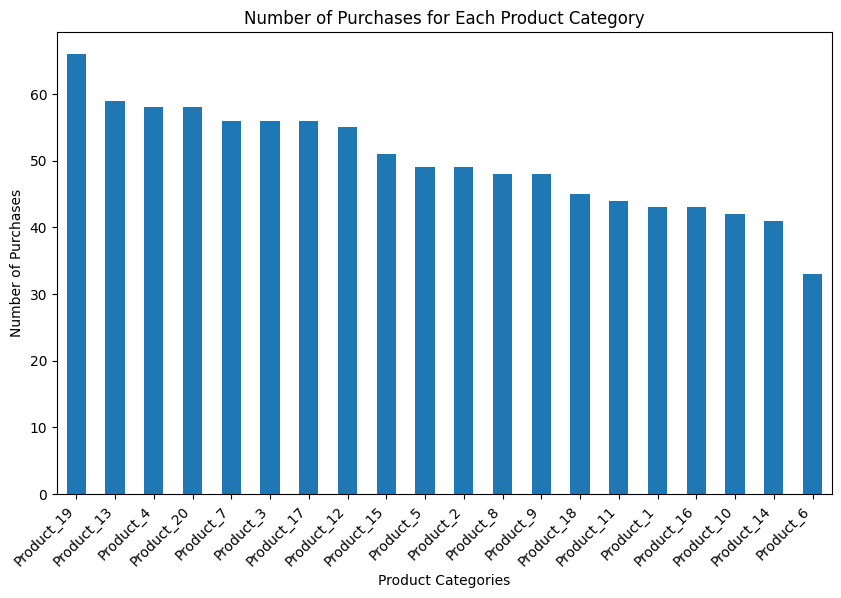

In [219]:
product_counts = df['Product_ID'].value_counts()

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.xlabel('Product Categories')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases for Each Product Category')
plt.xticks(rotation=45, ha='right')
plt.show()

The product categories are visualized in descending order of their demand based on the number of purchases.

In [220]:
merged_df = pd.merge(spreadsheet, df, on='User_ID', how='inner')

print(merged_df.head(20))

      User_ID    Page_Viewed  Time_Spent_Seconds  click_event   Purchase_ID   
0   User_3250      Cart Page                 111         True  Purchase_925  \
1   User_3250      Cart Page                 278         True  Purchase_925   
2   User_3250       Homepage                 244         True  Purchase_925   
3   User_3250      Cart Page                 225         True  Purchase_925   
4   User_3250  Checkout Page                 322         True  Purchase_925   
5   User_4030       Homepage                 574         True  Purchase_687   
6   User_3019   Product Page                 290         True   Purchase_58   
7   User_2761   Product Page                  85         True  Purchase_549   
8   User_2761  Category Page                 168         True  Purchase_549   
9   User_2761       Homepage                 432         True  Purchase_549   
10  User_3093  Checkout Page                 528         True  Purchase_323   
11  User_3093  Category Page                 518    

The merged datasets shows the relationship between user interactions amd purchase made by them.

Likelihood of a purchase can be measured by total purchases divided by total user interactions which is 1000/5000 = 1/5.

COHORT ANALYSIS:

In [221]:
split_parts = df['Purchase_Time'].str.split(' ')
df['Purchase_date'] = pd.to_datetime(split_parts.str[0])
print(df)

      Purchase_ID    User_ID  Product_ID  Transaction_Amount   
0    Purchase_948  User_3840  Product_19           62.843031  \
1    Purchase_905  User_1846   Product_9           21.780079   
2    Purchase_704  User_1700   Product_8          138.264455   
3    Purchase_766  User_4117  Product_15           74.991367   
4     Purchase_36  User_3053   Product_7          162.569998   
..            ...        ...         ...                 ...   
995  Purchase_489  User_2879  Product_14           47.047885   
996  Purchase_741   User_588   Product_1           85.587089   
997  Purchase_587  User_3821  Product_16          162.919467   
998  Purchase_222  User_1804  Product_10           44.435545   
999  Purchase_609  User_3364  Product_14          147.367700   

           Purchase_Time Purchase_date  
0    2023-04-02 16:35:46    2023-04-02  
1    2023-04-14 16:38:27    2023-04-14  
2    2023-01-21 11:21:31    2023-01-21  
3    2023-01-29 04:44:04    2023-01-29  
4    2023-05-24 03:30:23  

Since we didn't have the data for user sign-up date, I took the purchase date to create cohorts.

In [222]:

# Extract month and year from the 'sign_up_date' column
df['purchase_month'] = df['Purchase_date'].dt.month
df['purchase_year'] = df['Purchase_date'].dt.year

# Combine month and year to form a cohort label
df['cohort_label'] = df['purchase_year'].astype(str) + '-' + df['purchase_month'].astype(str)

# Group users based on cohort label to create cohorts
cohorts = df.groupby('cohort_label')

# Print the cohorts or perform further analysis on each cohort
for cohort_label, cohort_users in cohorts:
    print(f"Cohort: {cohort_label}")
    print(cohort_users[['User_ID', 'Purchase_date']])
    print('\n')

Cohort: 2023-1
       User_ID Purchase_date
2    User_1700    2023-01-21
3    User_4117    2023-01-29
5    User_3759    2023-01-29
12   User_1698    2023-01-30
16   User_1935    2023-01-19
..         ...           ...
960  User_4347    2023-01-21
966  User_4326    2023-01-29
982   User_520    2023-01-17
987  User_1880    2023-01-20
992  User_2952    2023-01-17

[157 rows x 2 columns]


Cohort: 2023-2
       User_ID Purchase_date
14   User_2129    2023-02-22
20   User_2109    2023-02-15
28   User_4313    2023-02-24
42   User_3019    2023-02-09
45   User_1865    2023-02-19
..         ...           ...
941  User_4553    2023-02-23
944  User_4940    2023-02-02
975   User_416    2023-02-25
996   User_588    2023-02-19
999  User_3364    2023-02-18

[129 rows x 2 columns]


Cohort: 2023-3
       User_ID Purchase_date
7    User_3228    2023-03-22
9     User_940    2023-03-06
13   User_3271    2023-03-18
21    User_818    2023-03-29
23   User_4172    2023-03-25
..         ...           ...
931 

In [223]:
cohort_sizes = df.groupby('cohort_label')['User_ID'].nunique()
retention_rates = []

for cohort_label, cohort_users in df.groupby('cohort_label'):
    cohort_users_set = set(cohort_users['User_ID'])
    retention = []
    
    for month in range(1, df['Purchase_date'].dt.to_period('M').nunique() + 1):
        cohort_month_users = df[(df['cohort_label'] == cohort_label) & (df['Purchase_date'].dt.to_period('M').rank() <= month)]
        retention_rate = cohort_month_users['User_ID'].nunique() / cohort_sizes[cohort_label]
        retention.append(retention_rate)
    
    retention_rates.append({'cohort_label': cohort_label, 'retention_rate': retention})


retention_df = pd.DataFrame(retention_rates)


print(retention_df)

  cohort_label                       retention_rate
0       2023-1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1       2023-2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2       2023-3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3       2023-4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4       2023-5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
5       2023-6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
6       2023-7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


This is retention analysis which is supposed to tell that how many users came back to make a purchase after their initial purchase. As you can see it is Zero for all cohorts in this case.

LIFETIME VALUE:

In [224]:
# Calculate amount generated by each cohort
cohort_revenue = df.groupby('purchase_month')['Transaction_Amount'].sum()

# Calculate the average lifetime of customers in each cohort (time between purchase and last interaction)
cohort_lifetime = (df.groupby('User_ID')['purchase_month'].max() - df.groupby('User_ID')['purchase_month'].min()).mean()

# Calculate the lifetime value of customers in each cohort
cohort_ltv = cohort_revenue * cohort_lifetime

# Print the lifetime value of customers for each cohort
print(cohort_ltv)

purchase_month
1    2764.946926
2    2427.737497
3    2735.931052
4    2703.092767
5    2629.756324
6    2559.441358
7    2523.091318
Name: Transaction_Amount, dtype: float64


WEBSITE PERFORMANCE OPTIMIZATION:

In [225]:
wdf = pd.read_csv('/Users/bhumikajain/Downloads/website_performance.csv')

In [226]:
print(wdf)

         Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0   2023-01-01        5.106652     0.514345         0.047375
1   2023-02-01        7.828199     0.317157         0.062764
2   2023-03-01        3.239983     0.480903         0.050514
3   2023-04-01        5.954509     0.473572         0.057151
4   2023-05-01        9.872398     0.542407         0.089525
5   2023-06-01        7.333456     0.440715         0.048687
6   2023-07-01        3.372264     0.390081         0.048440
7   2023-08-01        7.115272     0.489165         0.038263
8   2023-09-01        8.384957     0.301692         0.063365
9   2023-10-01        2.468395     0.566843         0.065971
10  2023-11-01        4.429745     0.526560         0.065786
11  2023-12-01        5.289363     0.388364         0.082828


Strategies to reduce bounce rate:

1. Reduce Page Load Time 
2. Exit Pop-ups: Use exit-intent pop-ups to display relevant offers or messages to users who are about to leave the website.
3. Providing quality content and appropriate product recommendations on the Home Page.
4. Creating a visually appealing website design.
5. Including links to other pages and relevant offers on the main page.
6. Trying and testing different layouts for lower Bounce rate.

To improve the conversion rate:

1. Make the form filling/cart to checkout process as easy as possible.
2. Use persuasive language and Call to Action(CTAs) that stand out.
3. Display customer reviews and ensure privacy in order to build trust.
4. Use limited-time offers or stock availability to create a sense of urgency and prompt users to take immediate action.
5. Offer Multiple Payment Options.
6. Provide discounts, free trials, or other incentives to encourage users to convert.

In [227]:
import plotly.express as px

In [228]:
line_chart = px.line(wdf, x='Month', y='Page_Load_Time', title='Page Load Time Trend Over Time')
line_chart.update_xaxes(title_text='Month')
line_chart.update_yaxes(title_text='Page Load Time (seconds)')

In [229]:
bar_chart = px.bar(wdf, x='Month', y=['Bounce_Rate', 'Conversion_Rate'],
                   title='Bounce Rate vs. Conversion Rate Across Months')
bar_chart.update_xaxes(title_text='Month')
bar_chart.update_yaxes(title_text='Percentage')

Reminder:
My Localhost for the app - http://127.0.0.1:8050/